In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


In [2]:
import pandas as pd 
import matplotlib as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
movies = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
movies.tail(10)

,movieId,title,genres
27268,131241,Ants in the Pants (2000),Comedy|Romance
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy
27271,131250,No More School (2000),Comedy
27272,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [5]:
tags = pd.read_csv('../input/movielens-20m-dataset/tag.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [6]:
ratings = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


**Data Structures:**

In [7]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [8]:
print(row_0)

userId                        18
movieId                     4141
tag                  Mark Waters
timestamp    2009-04-24 18:19:40
Name: 0, dtype: object


In [9]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [10]:
row_0['userId']

18

In [11]:
'rating' in row_0

False

In [12]:
row_0.name

0

In [13]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

**DataFrames**

In [14]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [15]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [16]:
tags.iloc[ [0,11,500] ]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
11,65,1783,noir thriller,2013-05-10 01:39:43
500,342,55908,entirely dialogue,2012-01-31 18:41:16


**Descriptive Statistics**

In [17]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [18]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [19]:
ratings['rating'].mean()

3.5255285642993797

In [20]:
#ratings.mean()

In [21]:
ratings['rating'].min()

0.5

In [22]:
ratings['rating'].max()

5.0

In [23]:
ratings['rating'].std()

1.0519889192942424

In [24]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [25]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [26]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [27]:
filter2 = ratings['rating'] > 0
filter2.all()

True

**Data Cleaning: Handling Missing Data**

In [28]:
movies.shape

(27278, 3)

In [29]:
movies.isnull().any().any()


False

In [30]:
ratings.shape


(20000263, 4)

In [31]:
ratings.isnull().any().any()


False

In [32]:
tags.shape


(465564, 4)

In [33]:
tags.isnull().any().any()


True

In [34]:
tags=tags.dropna()


In [35]:
tags.isnull().any().any()


False

In [36]:
tags.shape


(465548, 4)

**Data Visualization**

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

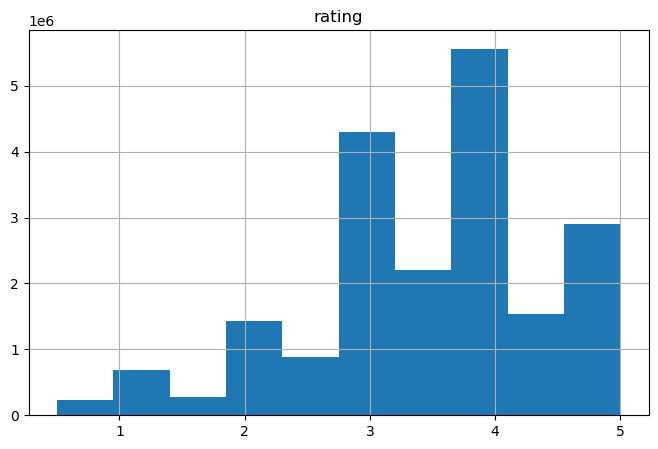

In [37]:
ratings.hist(column='rating', figsize=(8,5))


<Axes: >

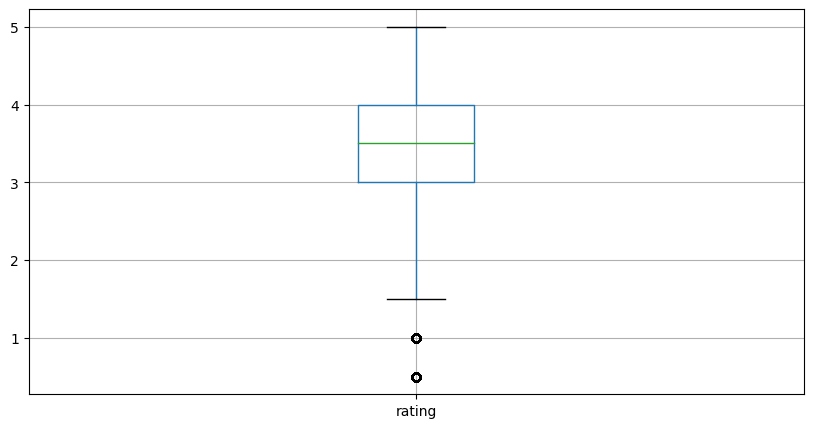

In [38]:
ratings.boxplot(column='rating', figsize=(10,5))


**Slicing Out Columns**

In [39]:
tags['tag'].head()


0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [40]:
movies[['title','genres']].head()


,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [41]:
ratings[-10:]


,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,2009-12-03 18:32:43
20000254,138493,61160,4.0,2009-11-16 16:55:37
20000255,138493,65682,4.5,2009-10-17 21:52:53
20000256,138493,66762,4.5,2009-10-17 18:50:08
20000257,138493,68319,4.5,2009-12-07 18:15:20
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24
20000262,138493,71619,2.5,2009-10-17 20:25:36


In [42]:
tag_counts = tags['tag'].value_counts()
tag_counts[-20:]

Slayer                           1
Good Versus Evil                 1
narf                             1
Tourettes                        1
insurance scam                   1
Kate Isitt                       1
Henry Ian Cusick                 1
Hans Matheson                    1
Wichita                          1
strip club                       1
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: tag, dtype: int64

<Axes: >

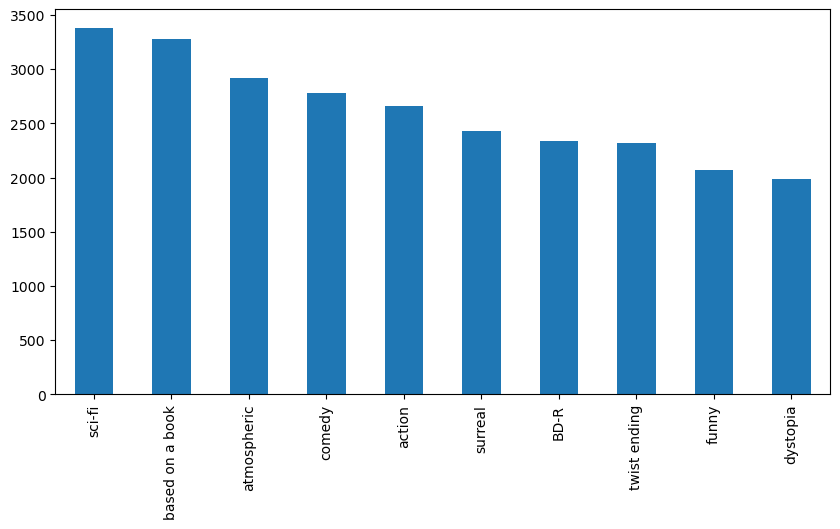

In [43]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

